# Water Potability Analysis


The prime objective is to analyze and predict **Water Potability** using the  `water_quality.csv` dataset.
This will entail data exploration, preprocessing, exploratory data analysis, model building, and evaluation.

## Data Overview and Initial Exploration

### Subtask:
To nderstand the dataset's structure, data types, and initial statistics. This includes checking for missing values and understanding the distribution of key features, including the 'Potability' target variable.


In [5]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('water_quality.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [8]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


**Reasoning**:
To address the subtask of understanding the dataset's structure and initial statistics, I will first check for missing values using `isnull().sum()`, then generate descriptive statistics for numerical columns with `describe()`, and finally display the distribution of the 'Potability' column using `value_counts()`.



In [9]:
print("Missing Values:\n", df.isnull().sum())
print("\nDescriptive Statistics:\n", df.describe())
print("\nPotability Distribution:\n", df['Potability'].value_counts())

Missing Values:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Descriptive Statistics:
                 ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  T

## Data Preprocessing and Cleaning

### Subtask:
Handle missing values in 'ph', 'Sulfate', and 'Trihalomethanes' columns using median imputation.


**Reasoning**:
To handle missing values in 'ph', 'Sulfate', and 'Trihalomethanes' columns, I will calculate the median for each of these columns and then use these medians to fill the missing values. Afterwards, I will verify that all missing values have been handled by checking the sum of null values for the entire DataFrame.



In [10]:
df['ph'].fillna(df['ph'].median(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace=True)

print("Missing Values after imputation:\n", df.isnull().sum())

Missing Values after imputation:
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


/tmp/ipython-input-456175636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].median(), inplace=True)
/tmp/ipython-input-456175636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin


## Exploratory Data Analysis (EDA)

### Subtask:
Here we will analyze distributions of all numerical features, examine their relationship with the 'Potability' target variable using box plots, and identify correlations between features using a heatmap.

**Reasoning**:
To visualize the distributions of the numerical features, I will create histograms for each column in the DataFrame.
To understand how each feature relates to the 'Potability' target variable, I will generate box plots for each feature, grouped by 'Potability'.
Finally, to identify the relationships between all features, including the target variable, I will compute and display a correlation matrix as a heatmap.

This step helps in understanding data patterns, potential feature importance, and potential multicollinearity among features. It also helps detect outliers and the spread of data for each feature in relation to the target variable, which is crucial for subsequent modeling steps.

## Exploratory Data Analysis (EDA)

### Subtask:
Visualize the distributions of all numerical features, examine their relationship with the 'Potability' target variable using box plots, and identify correlations between features using a heatmap.


**Reasoning**:
First, I will generate histograms for each numerical feature to visualize their distributions, ensuring proper titles and labels for clarity.



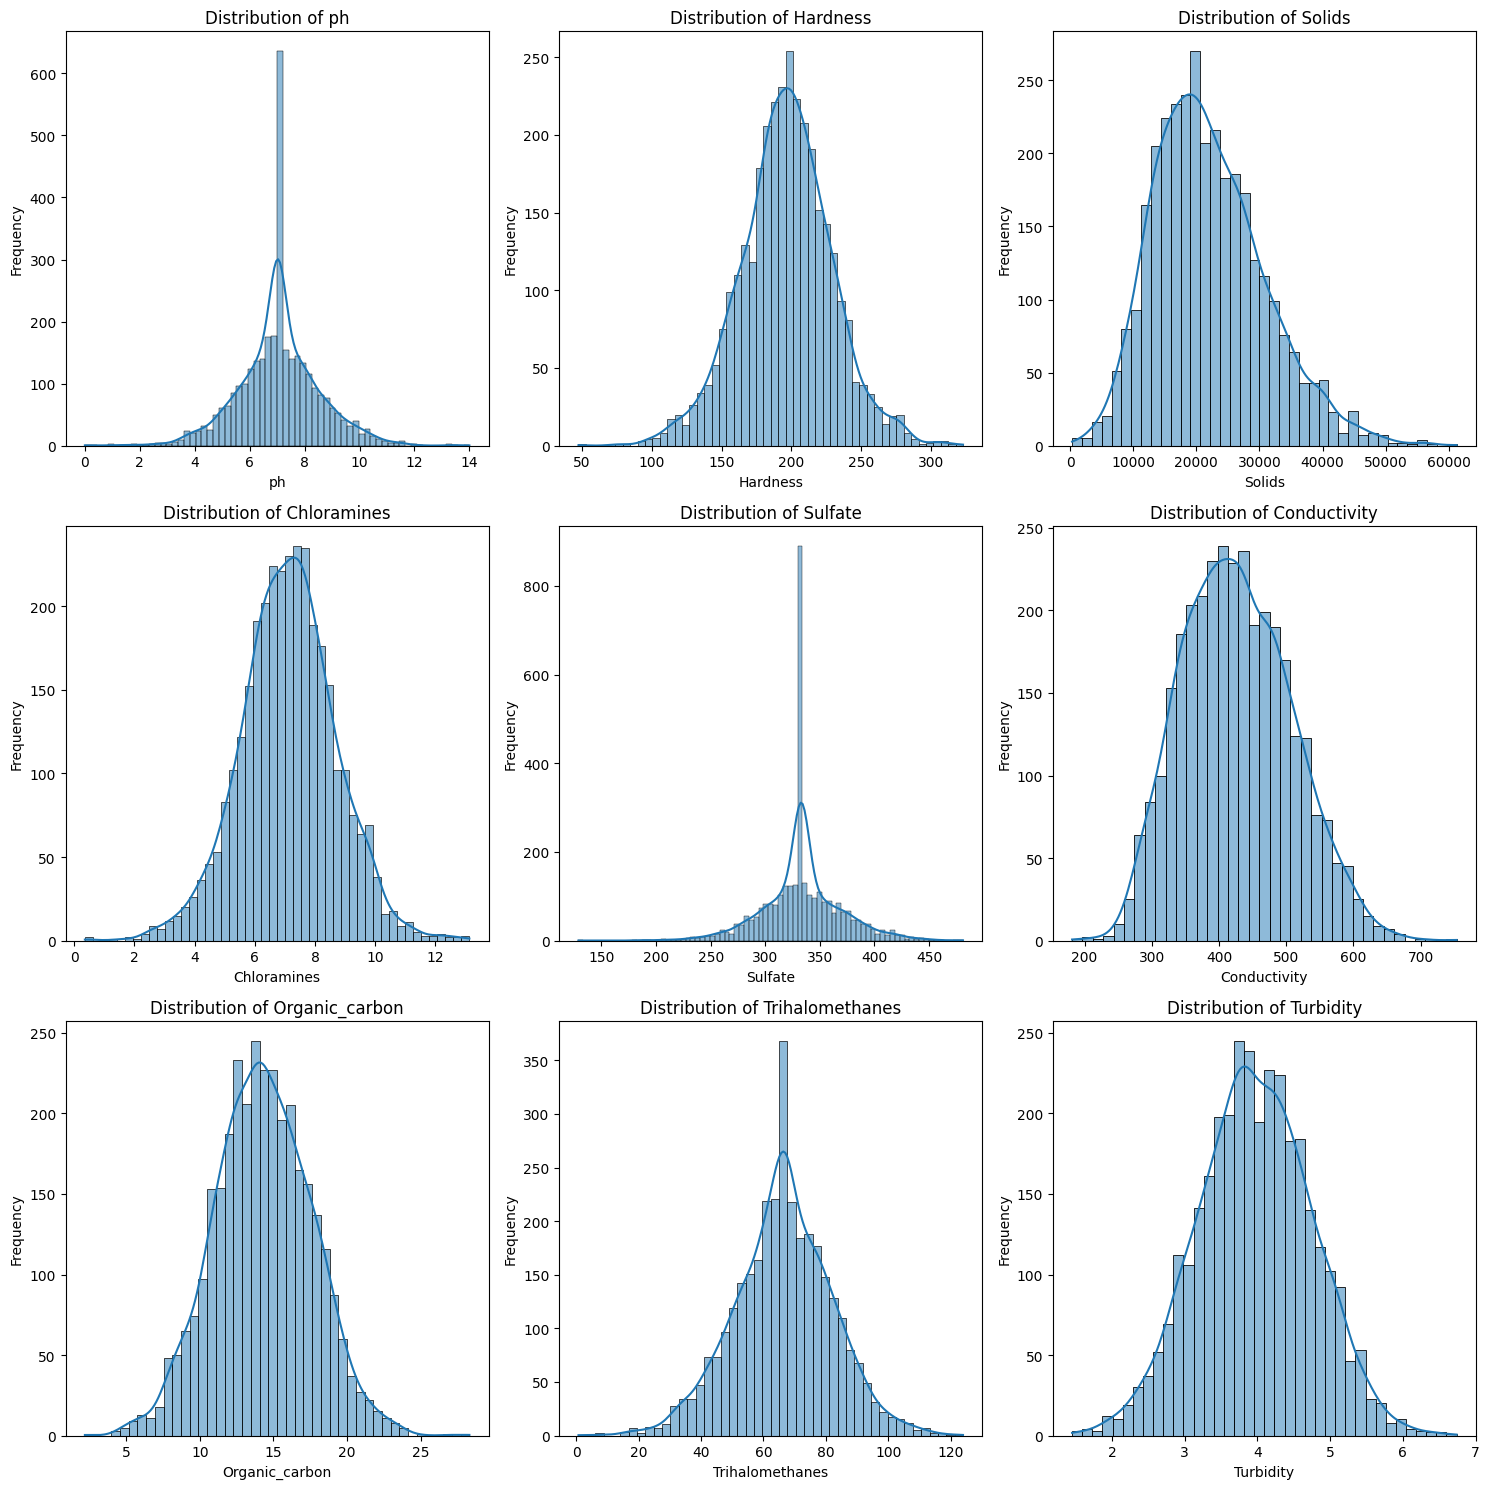

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical features excluding 'Potability'
numerical_features = df.columns.drop('Potability')

# Plot histograms for numerical features
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



Now that the distributions of numerical features have been visualized with histograms, I will proceed to create box plots for each numerical feature against the 'Potability' target variable to examine their relationships.



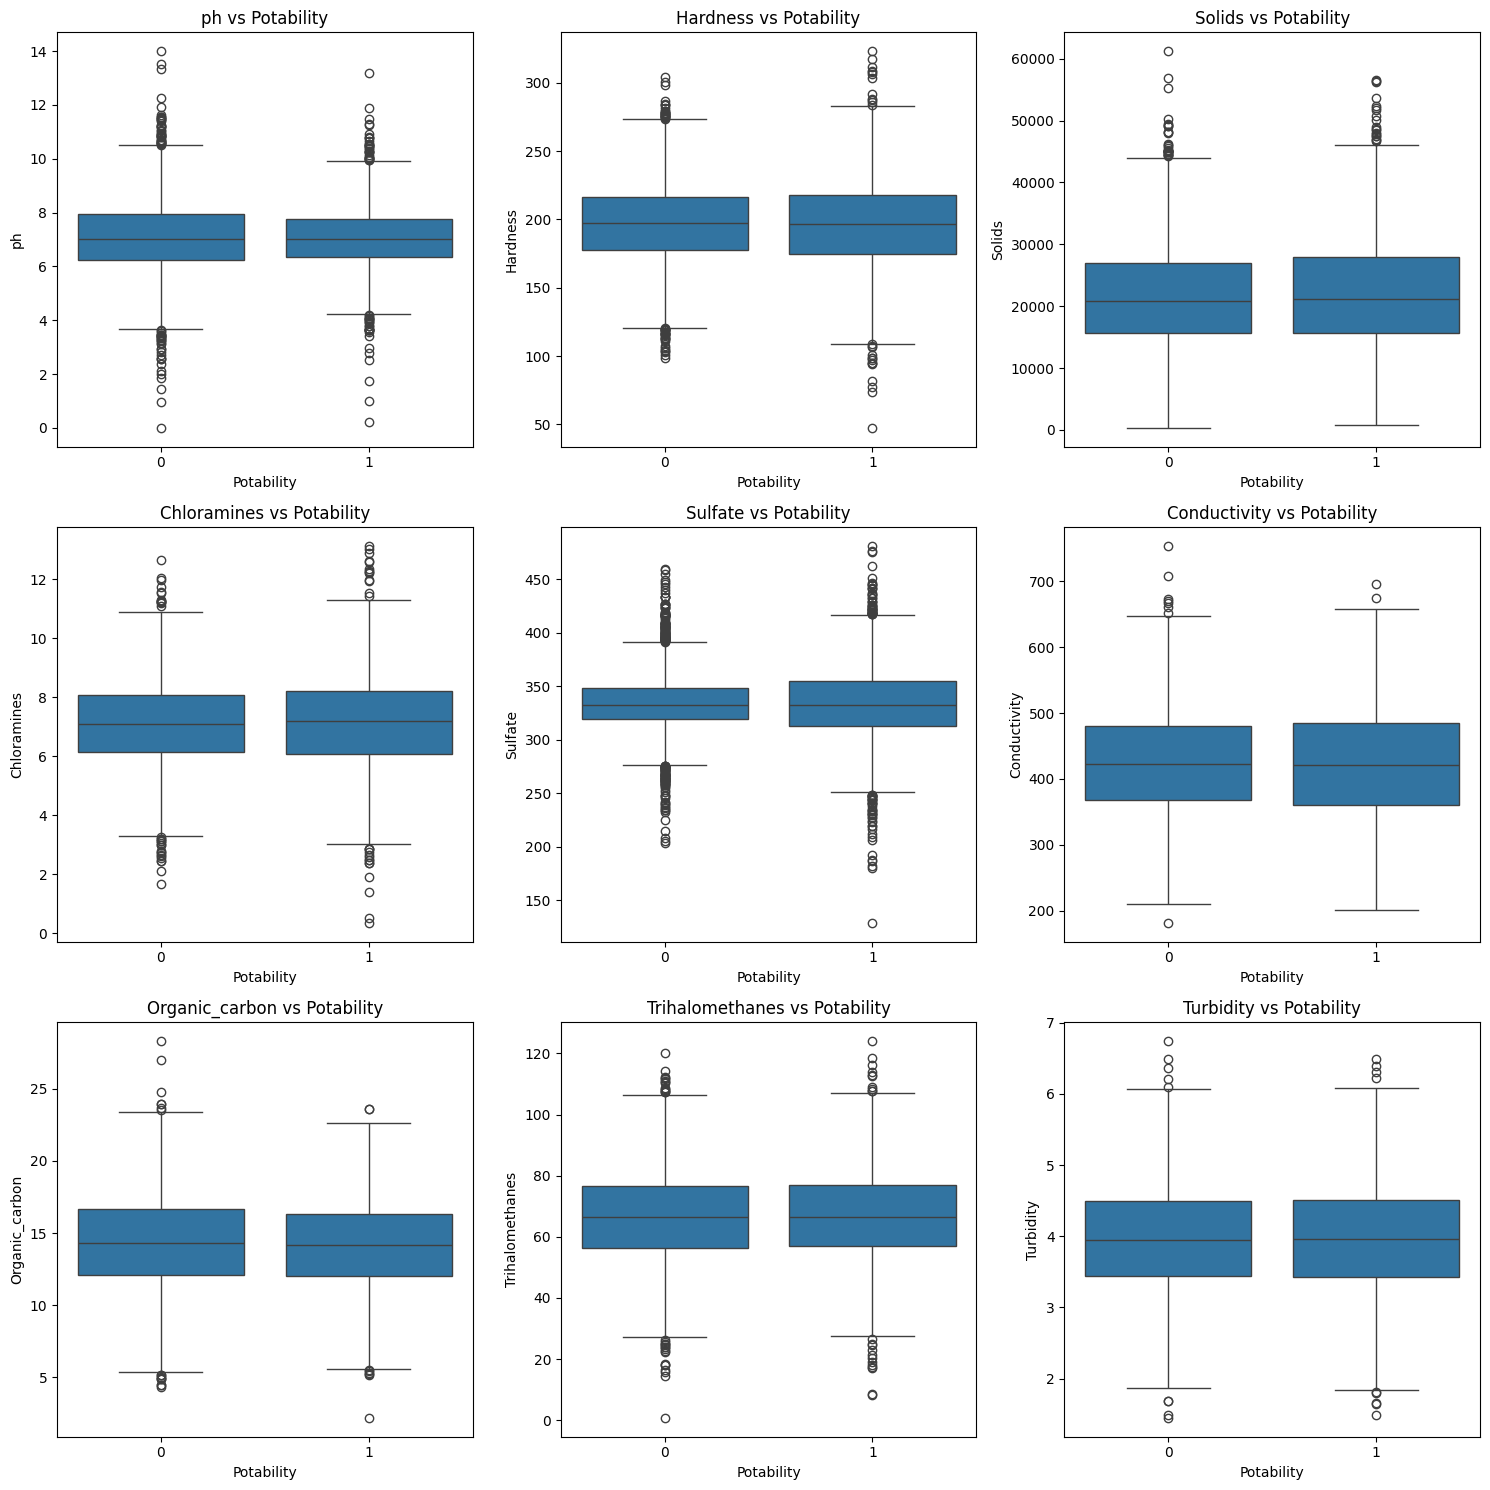

In [12]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Potability', y=column, data=df)
    plt.title(f'{column} vs Potability')
    plt.xlabel('Potability')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

**Reasoning**:
To complete the EDA subtask, I will now calculate the correlation matrix for all features and visualize it as a heatmap to identify relationships between variables, including the 'Potability' target variable.



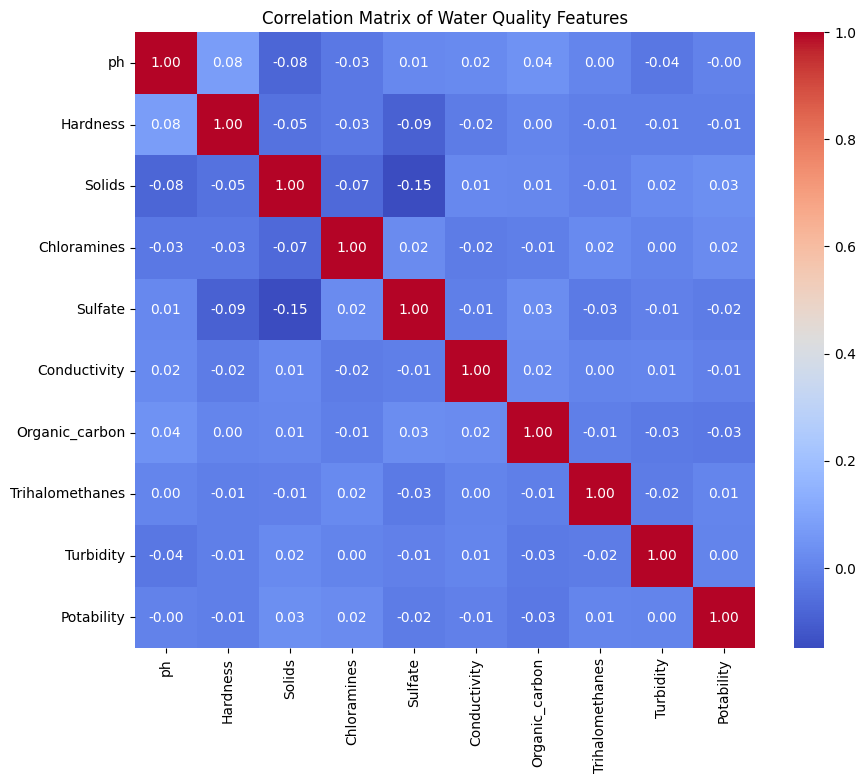

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Water Quality Features')
plt.show()

## Model Building and Training

### Subtask:
Develop a machine learning model to predict water potability. This involves separating features and target, splitting the data, scaling numerical features, and training a classification model.


### Separate features and target

**Reasoning**: I'm separating the features (`X`) from the target variable (`y`) to prepare the data for model training. The 'Potability' column will be our target, and all other columns will serve as features.

**Reasoning**:
I will now separate the features (X) from the target variable (y) using the DataFrame `df`.



In [13]:
X = df.drop('Potability', axis=1)
y = df['Potability']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (3276, 9)
Shape of y: (3276,)


**Reasoning**:
Now that features and the target variable are separated, I will split the dataset into training and testing sets using `train_test_split` to prepare the data for model training and evaluation.



In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2620, 9)
Shape of X_test: (656, 9)
Shape of y_train: (2620,)
Shape of y_test: (656,)


**Reasoning**:
To standardize the numerical features, I will import `StandardScaler` from `sklearn.preprocessing`, instantiate it, fit it to the training features (`X_train`), and then transform both the training and testing features (`X_train` and `X_test`). This ensures that all features have a mean of 0 and a standard deviation of 1, which is crucial for many machine learning algorithms.



In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (2620, 9)
Shape of X_test_scaled: (656, 9)


**Reasoning**:
To complete the model building process, I will now train a classification model using `LogisticRegression` from `sklearn.linear_model`. I will instantiate the model with `random_state=42` for reproducibility and then fit it to the scaled training data (`X_train_scaled`, `y_train`).



In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Model Evaluation

### Subtask:
Assess the performance of the trained model using relevant metrics such as accuracy, precision, recall, and F1-score.


**Reasoning**:
To assess the model's performance, I will first make predictions on the scaled test data (`X_test_scaled`) using the trained logistic regression model.



In [18]:
y_pred = model.predict(X_test_scaled)
print("Predictions made successfully.")

Predictions made successfully.


**Reasoning**:
Now that predictions are made, I will import the necessary metrics from `sklearn.metrics`, calculate the accuracy, precision, recall, and F1-score, and compute the confusion matrix, then print all these results to evaluate the model's performance.



In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.6280
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Confusion Matrix:
 [[412   0]
 [244   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
The previous model evaluation indicated `Precision`, `Recall`, and `F1-Score` were 0.0, accompanied by an `UndefinedMetricWarning`. This suggests the model is failing to predict any positive classes, likely due to class imbalance. To address this, I will modify the Logistic Regression model to include `class_weight='balanced'` during training, which helps the model give more importance to the minority class.



In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully with balanced class weights.")

Logistic Regression model trained successfully with balanced class weights.


**Reasoning**:
Now that the model has been retrained with balanced class weights, I need to make new predictions on the scaled test data (`X_test_scaled`) using this updated model to assess its performance.



In [22]:
y_pred_balanced = model.predict(X_test_scaled)
print("Predictions made successfully with balanced model.")

Predictions made successfully with balanced model.


**Reasoning**:
To complete the re-evaluation of the model after balancing class weights, I will now calculate and print the accuracy, precision, recall, F1-score, and the confusion matrix using the new predictions from the balanced model (`y_pred_balanced`).



In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced)
recall_balanced = recall_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)

print(f"Accuracy (balanced): {accuracy_balanced:.4f}")
print(f"Precision (balanced): {precision_balanced:.4f}")
print(f"Recall (balanced): {recall_balanced:.4f}")
print(f"F1-Score (balanced): {f1_balanced:.4f}")
print("\nConfusion Matrix (balanced):\n", conf_matrix_balanced)

Accuracy (balanced): 0.5015
Precision (balanced): 0.3699
Recall (balanced): 0.4836
F1-Score (balanced): 0.4192

Confusion Matrix (balanced):
 [[211 201]
 [126 118]]


## Conclusion and Insights

### Subtask:
Summarize the key findings from the analysis and model. Discuss the most influential factors for water potability and the model's effectiveness.


## Summary:

### Data Analysis Key Findings

*   **Exploratory Data Analysis (EDA):**
    *   Visualizations (histograms, box plots, and a correlation heatmap) were successfully generated, providing an overview of numerical feature distributions, their relationships with the 'Potability' target, and inter-correlations.
*   **Model Building and Evaluation:**
    *   The dataset was prepared by separating features and target, splitting data into training (80%) and testing (20%) sets, and scaling numerical features using `StandardScaler`.
    *   An initial Logistic Regression model severely suffered from class imbalance, classifying all 656 test samples as non-potable, resulting in 0.00 Precision, Recall, and F1-Score for the positive class.
    *   Retraining the Logistic Regression model with `class_weight='balanced'` addressed the class imbalance.
    *   The balanced model achieved an Accuracy of approximately 0.5015, Precision of 0.3699, Recall of 0.4836, and an F1-Score of 0.4192.
    *   The confusion matrix for the balanced model was `[[211 201], [126 118]]`, indicating it could now predict both classes, though with significant false positives and false negatives.

### Insights or Next Steps

*   The model's performance, particularly in Recall and F1-Score, suggests room for improvement, possibly through further feature engineering, hyperparameter tuning, or exploring more sophisticated classification algorithms better suited for imbalanced datasets.
*   Given the persistent challenge of predicting water potability accurately, investigating the specific features that most strongly differentiate potable from non-potable water, as indicated by the EDA, could inform more effective feature selection or engineering strategies.
